In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,Bidirectional
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import numpy as np

In [2]:
tokenizer = Tokenizer()
data = open('../story.txt').read()

corpus = data.split('\n')
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index)+1 
total_words

1440

In [3]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = tf.keras.utils.to_categorical(label, num_classes=total_words)


In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(300, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(200))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 142, 100)          144000    
_________________________________________________________________
bidirectional (Bidirectional (None, 142, 600)          962400    
_________________________________________________________________
dropout (Dropout)            (None, 142, 600)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               640800    
_________________________________________________________________
dense (Dense)                (None, 720)               144720    
_________________________________________________________________
dense_1 (Dense)              (None, 1440)              1038240   
Total params: 2,930,160
Trainable params: 2,930,160
Non-trainable params: 0
______________________________________________

In [5]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
78/78 [==============================] - 95s 1s/step - loss: 8.9838 - accuracy: 0.0182
Epoch 2/100
78/78 [==============================] - 89s 1s/step - loss: 7.0367 - accuracy: 0.0324
Epoch 3/100
78/78 [==============================] - 88s 1s/step - loss: 6.7500 - accuracy: 0.0322
Epoch 4/100
78/78 [==============================] - 90s 1s/step - loss: 6.5876 - accuracy: 0.0236
Epoch 5/100
78/78 [==============================] - 89s 1s/step - loss: 6.4449 - accuracy: 0.0287
Epoch 6/100
78/78 [==============================] - 89s 1s/step - loss: 6.4309 - accuracy: 0.0326
Epoch 7/100
78/78 [==============================] - 88s 1s/step - loss: 6.2927 - accuracy: 0.0290
Epoch 8/100
78/78 [==============================] - 90s 1s/step - loss: 6.0984 - accuracy: 0.0357
Epoch 9/100
78/78 [==============================] - 89s 1s/step - loss: 6.0995 - accuracy: 0.0278
Epoch 10/100
78/78 [==============================] - 89s 1s/step - loss: 6.0496 - accuracy: 0.0316
Epoch 11/

78/78 [==============================] - 87s 1s/step - loss: 1.3162 - accuracy: 0.9069
Epoch 83/100
78/78 [==============================] - 88s 1s/step - loss: 1.4113 - accuracy: 0.8644
Epoch 84/100
78/78 [==============================] - 88s 1s/step - loss: 1.5533 - accuracy: 0.8392
Epoch 85/100
78/78 [==============================] - 88s 1s/step - loss: 1.3919 - accuracy: 0.8834
Epoch 86/100
78/78 [==============================] - 87s 1s/step - loss: 1.2254 - accuracy: 0.9251
Epoch 87/100
78/78 [==============================] - 88s 1s/step - loss: 1.1737 - accuracy: 0.9306
Epoch 88/100
78/78 [==============================] - 88s 1s/step - loss: 1.1079 - accuracy: 0.9438
Epoch 89/100
78/78 [==============================] - 88s 1s/step - loss: 1.0582 - accuracy: 0.9593
Epoch 90/100
78/78 [==============================] - 88s 1s/step - loss: 1.0324 - accuracy: 0.9648
Epoch 91/100
78/78 [==============================] - 88s 1s/step - loss: 0.9868 - accuracy: 0.9692
Epoch 92/100


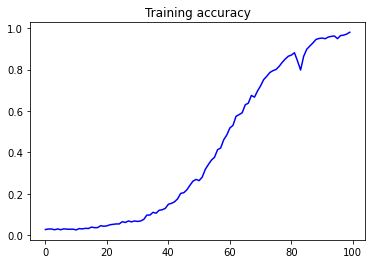

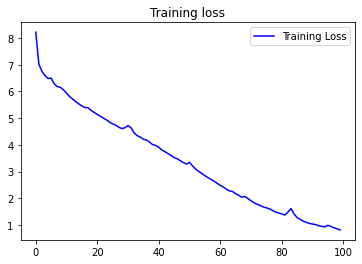

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [7]:
seed_text = "يحيى"
next_words = 200
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/home/yahyaubuntu/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


يحيى حزيناً الفتاة نهائيا، خسر لها الذي ستسقط فيه تلك الورقة، ولكنها لم تسقط أبدا، وذهب الخريف وحل الشتاء والورقة متشبثة بغصن الشجرة، وتعافت الفتاة شيئا فشيئا، ولما تماثلت الفتاة للشفاء تماما وأصبحت بكامل عافيتها خرجت لخارج المنزل وتوجهت للشجرة ولمست ورقة الشجرة الأخيرة، فاكتشفت أن الورقة من مادة البلاستيك، وعرفت أن أختها ثبتت هذه الورقة حتى لا تفقد أختها الأمل، الأمل يجدد الروح ويصنع المستحيل وإذا تعلق القلب بالله لن يخيب أبدا أمله ولا رجاه لكي فعلوه بعد غضبت نستمتع أسعد المادي، لقد أحبها لشخصها وليس لما يملكه والدها حيث أنه ليس في حاجة إليه من الأساس المائدة وأم مسلمة للعمل، طويلا وأنه فانفجرت في وجهه وقررا الطلاق وأنهما لن يستطيعا الاستمرار هكذا، واتفقا على أن الزوجة هي التي سوف تتكفل بتربية الولد على أن يرسل لها مبلغ مالي شهرياً أراد مستوى معاملتهم لها يوما وزوجته كان وجهه سويا الولد وأنه فكانوا في بيت أخواله لا يعاملونه معاملة حسنة، فكان لهم أولاد وهم يفضلونهم عليه في كل الأمور، ولكن الولد لا يهمه كل ذلك لأن قلبه متعلق بأبيه فقط ويريد العيش معه، فكان يذهب لأبيه كل يوم ليراه ويجلس 